# CASE STUDY: VISA RUPAY CREDIT CARD COMPANY

## VisaRuPay Credit Card Company

VisaRuPay is a consumer credit card company that has a large number of customers (or accounts). These customers charge some of their purchases on their VisaRuPay cards. The charges made in one month are due by the end of the next month. If a customer fails to make
the minimum payment in a given month, the company flags the account as delinquent. The company keeps track of the payment history of each customer so that it can identify customers who are likely to default on their obligations and not pay their debt to the company.

### STATE DESCRIPTIONS

Customer's State (or stage) k: if he or she has missed making the minimum payment for the last k consecutive months.

#### Four possible futures: 
a) Minimum payment (or more) and move to stage 0. </br> 
<br> b) Make no payment (or less than the minimum payment) and move to stage k+1. </br>
<br> c) Default by declaring bankruptcy, thus moving to stage D or the company can cancel the customer’s card and terminate the account. (state C). </br> 

#### Current Policy (Pc)

Currently the company has a simple policy: it terminates an account as soon as it misses seven minimum payments in a row and writes off the remaining outstanding balance on that account as a loss.


  | k | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
  | --- | --- | --- | --- | --- | --- | --- | --- |
  | pk | 0.033 | 0.048 | 0.090 | 0.165 | 0.212 | 0.287 | 0.329 |
  | qk | 0.030 | 0.021 | 0.037 | 0.052 | 0.075 | 0.135 | 0.182 |
  | bk | 1243.78 | 2090.33 | 2615.16 | 3073.13 | 3502.99 | 3905.77 | 4280.26 |

where,

pk:  Probability that a customer in state k fails to make the minimum payment in the current period and thus moves to state k+1. </br>
<br> qk:  Probability that a customer in state k declares bankruptcy in the current period and thus moves to state D. </br>
<br> bk:  Average outstanding balance of a customer in state k. </br>


In [111]:
# IMPORTING THE NECESSARY LIBRARIES
import numpy as np
from pydtmc import MarkovChain as mc
import pydot
from matplotlib import pyplot as plt

In [51]:
dir(mc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_absorbing_states_indices',
 '_calculate_period',
 '_communicating_classes_indices',
 '_create_rng',
 '_cyclic_classes_indices',
 '_cyclic_states_indices',
 '_gth_solve',
 '_recurrent_classes_indices',
 '_recurrent_states_indices',
 '_slem',
 '_states_indices',
 '_transient_classes_indices',
 '_transient_states_indices',
 'absorbing_states',
 'absorption_probabilities',
 'absorption_times',
 'accessibility_matrix',
 'adjacency_matrix',
 'are_communicating',
 'backward_committor',
 'backward_committor_probabilities',
 'birth_death',
 'communicating_classes',
 'conditional_distribution',
 'conditional_probabilities',
 'cyc

###  Question 1
Build a stochastic model using DTMC to help the management of VisaRuPay analyze the performance of this policy in a rational way. Assume that the state of an account changes in a Markov fashion and when a customer account is terminated or the customer declares bankruptcy, it simply replaces that account with an active one, so that number of accounts does not change. 

## TRANSITION PROBABILITY MATRIX

In [59]:
p = [0.033,0.048,0.090,0.165,0.212,0.287,0.382]
p_bar = [round((1-i),3) for i in p]
q = [0.030,0.021,0.037,0.052,0.075,0.135,0.182]
b = [1243.78,2090.33,2615.16,3073.13,3502.99,3905.77,4280.26]

n_states = 7
# Defining the TPM
TPM = []
for i in range(n_states):
    l = []
    if i == 6:
        l.append(p_bar[i]+p[i])
    else:
        l.append(p_bar[i])
    for j in range(1,n_states):
        if j==i+1:
            l.append(p[i])
        else:
            l.append(0)
    
    TPM.append(l)
print(TPM)

[[0.967, 0.033, 0, 0, 0, 0, 0], [0.952, 0, 0.048, 0, 0, 0, 0], [0.91, 0, 0, 0.09, 0, 0, 0], [0.835, 0, 0, 0, 0.165, 0, 0], [0.788, 0, 0, 0, 0, 0.212, 0], [0.713, 0, 0, 0, 0, 0, 0.287], [1.0, 0, 0, 0, 0, 0, 0]]


In [60]:
# Stochastic process

process = mc(TPM, ['0','1','2','3','4','5','6'])
#print(process)

### Answer 1

####  DISCRETE-TIME MARKOV CHAIN
 SIZE:         7 </br>
 <br> CLASSES:      1 </br>
 <br> 1) RECURRENT: 1 </br>
 <br> 2) TRANSIENT: 0 </br>
 <br> ABSORBING:    NO </br>
 <br> APERIODIC:    YES </br>
 <br> IRREDUCIBLE:  YES </br>
 <br> ERGODIC:      YES </br>

### Question 2

Analyze the current policy (Pc), which terminates an account as soon as it misses the seventh minimum payment in a row by assuming expected annual loss due to bankruptcies and account closures as performance measure.

In [61]:
# STATIONARY DISTRIBUTION 
stat_dist = (process.pi)
print(stat_dist[0])

[9.66410938e-01 3.18915610e-02 1.53079493e-03 1.37771543e-04
 2.27323046e-05 4.81924858e-06 1.38312434e-06]


526.9881298857248


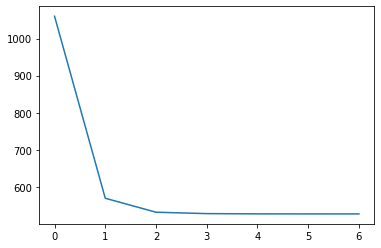

In [139]:
###### Annual Loss per customer
# As soon as 

def annual_loss_Pc(stat_dist, q, b, p, c):
    annual_loss_pc = 0
    for i in range(c):
        annual_loss_pc += stat_dist[0][i]*q[i]*b[i]
        #print(annual_loss_pc)
    annual_loss_pc += p[c-1]*stat_dist[0][c-1]*b[c-1]
    return(annual_loss_pc)


plt.plot(annual_losses_Pc)

### Answer 2

#### Annual loss of the company per customer is  526.988 million dollars.


### Question 3

Now VisaRuPay has been approached by a debt collection agency, SPI. If a customer declares bankruptcy, VisaRuPay loses the entire outstanding balance as before. However, if a customer does not declare bankruptcy, the company can decide to terminate the account and turn it over to the SPI company. If VisaRuPay decides to do this, SPI pay VisaRuPay 75% of the current outstanding balance on that account. When an account is turned over to SPI, it collects the outstanding balance on the account from the account holder by legal means. VisaRuPay also has to pay SPI an annual retainer fee of $ 50k for this service.

VisaRuPay managmenet wants to decide if they should hire SPI and, if they do, when they should turn over an account to them. Suppose that VisaRuPay has 14 million accounts.


### Solution

We will consider 7 policies, 
Pm for every m belonging to: {0,1,2,3,4,5,6}

Pm is the policy such that you will handover the customer to SPI, if the customer misses the minimum payment for m consecutive days. </br>

<br>
We will calculate the Expected income considering each policy, and select the optimal one, i.e the one with maximum expected value.  
</br>


527010292.1044898


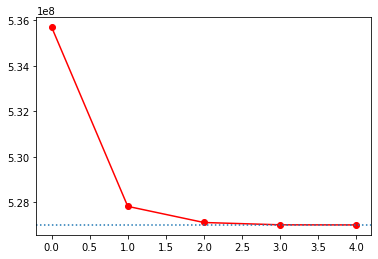

In [160]:
# Number of Customers Annually
n_cust = 14000000

# Evaluating policies
# m: policy parameter (i.e the handover condition)
# stat_dist: stationary distribution of states
# fixed_cost = fixed cost to be paid to SPI
# prop = proportion of each outstanding balance SPI pays.
# p = list of probabilities that the customer in state i 
#     fails to pay the minimum balance
# q = list of probabilities that customer goes bankrupt at ith state.

def ann_loss_Pm(stat_dist, m, fixed_cost, prop, p, q, b):
    annual_loss = 0
    for i in range(m):
        annual_loss += stat_dist[0][i]*q[i]*b[i]
    annual_loss += (1-prop)*b[m-1]*stat_dist[0][m-1]*p[m-1]
    return((n_cust*annual_loss + fixed_cost))


annual_losses_Pm = []
for i in range(2,7):
    k = ann_loss_Pm(stat_dist, i, 50000, 0.75, p, q,b)
    annual_losses_Pm.append(k)
print(min(annual_losses_Pm))

plt.plot(annual_losses_Pm, color = 'red', marker = 'o')
plt.axhline(y = annual_loss_Pc(stat_dist, q,b,p,i)*n_cust, linestyle='dotted')
plt.show()

### Answer

The policy should not be accepted, as in the best case the annual loss for the 527.01 million dollars, but the current policy has a loss of 526.88 million dollar.


### Question 

Suppose VisaRuPay has decided not to employ the services of SPI . However, this has generated discussion within the company about whether it should terminate accounts earlier. Let Tm (1≤m≤7)be the policy of terminating the account as soon as it misses m
payments in a row. Which policy should VisaRuPay follow?

In [152]:
annual_losses_Pc = []
for i in range(1,8):
    annual_losses_Pc.append((annual_loss_Pc(stat_dist, q,b,p,i)*n_cust/10**6))
minimum = 10000
argmin = 0
for i,j in enumerate((annual_losses_Pc)):
    if j < minimum:
        minimum = j
        argmin = i+1

print(argmin)

7


### Answer

The best policy is the current policy. i.e m = 7. 

### Question

Consider the current policy Pc. One of the managers wants to see if it would help toalert the customers of their impending account termination in a more dire form by a phone call when the customer has missed six minimum payments in a row. This will cost a dollar per call.
The manager estimates that this will decrease the missed payment probability from the current Pc = 0.329 to 0.250. Is this policy cost-effective?

In [156]:
P6_old = 0.329
P6_new = 0.250
decreased_loss = (P6_old - P6_new)*p[6]*b[6]
cost = 1
print(decreased_loss)

129.16968628000004


### Question 

The company has observed over the past year that the downturn in the economy has increased the bankruptcy rate by 50%. In this changed environment, should VisaRuPay engage the services of SPI? When should it turn over the accounts to SPI?

In [164]:
q_new = [i*1.5 for i in q]
annual_losses_Pms = []
for i in range(2,7):
    k = ann_loss_Pm(stat_dist, i, 50000, 0.75, p, q_new,b)
    annual_losses_Pms.append(k)
    
val = min(annual_losses_Pms)
print(val)

790467800.1610949


### Question
VisaRuPay has been approached by another collection agency, which is willing to work with no annual service contract fee. However, it pays only 60% of the outstanding balance of of any account turned over to them. Is this option better than hiring SPI?

In [166]:
annual_losses_Pms = []
for i in range(2,7):
    k = ann_loss_Pm(stat_dist, i, 0, 0.60, p, q,b)
    annual_losses_Pms.append(k)
print(min(annual_losses_Pms))

526971636.65218365
